<a href="https://colab.research.google.com/github/jin930303/AIStudy24/blob/master/%ED%99%95%EB%A5%A0%EC%A0%81%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MBC 마켓의 럭키백 성공으로 인해 각각의 지역에서 수산물을 제공하기로 하였다.

영업팀은 매주 7개의 생선 중에서 일부를 무작위로 골라 머신러닝 모델을 학습할 수 있게 훈련 데이터를 제공하고 있다.

하지만 수산물을 제공한다는 곳이 너무 많아서 샘플을 골라내는 일이 너무 힘들다.

추가되는 수산물의 샘플도 없다.

영업팀은 새로운 생선이 도착하는대로 가능한 즉시 훈련 데이터를 제공해야 한다.

#점진적 학습

##당면한 문제 : 훈련데이터가 한번에 준비되는 것이 아니라 조금씩 전달됨

<Br>
해결법1 : 기존의 훈련 데이터에 새로운 데이터를 추가하여 모델을 매일 매일 다시 훈련

단점 : 시간이 지날수록 데이터가 늘어남  - > 인력추가, 서버증설, 시간적 여유가 줄어든다.  -> 지속가능할까?
<br>
<br>

해결법2 : 새로운 데이터를 추가할 때 마다 이전 데이터를 버림, 훈련데이터 크기를 일정하게 유지하는 방법

단점 : 데이터를 버릴때 다른 데이터에 없는 중요한 생선 데이터가 포함되면 큰일
<br>
<br>

해결법3 : 점진적 학습 방법 (온라인 학습, 훈련한 모델을 버리지않고 조금씩 더  새로운 데이터를 학습) -> 확률적 경사 하강법


In [ ]:
# 확률적 경사 하강법 ( 실제 산에서 내려오는 것 처럼 가파른 길을 찾아 천천히 조금씩 내려옴)
# 확률적 : 무작위, 랜덤 ( 훈련세트에서 랜덤하게 하나의 샘플을 고른다.)
# 경사 : 기울기
# 하강 : 내려가는
# 확률적 경사 하강법은 훈련세트에서 랜덤하게 하나의 샘플을 선택해서 가파른 경사를 조금 내려감
# 위 방법을 반복수행
# 만약 모든 샘플을 다 사용해도 다 내려오지 못할 경우
#    처음부터 다시 시작함
#    훈련세트의 모든 샘플을 다시 채워놓음
#    다시 랜덤하게 하나의 샘플을 선택하여 이어서 경사를 내려감
# 만족할만한 위치에 도달할 때 까지 계속 내려감
# 훈련세트를 한번 모두 사용하는 과정을 에포크(epoch)라고 함.
#   일반적인 경사하강법은 수십, 수백번 이상 에포크를 수행한다.
# 만약 실제로 등산이라고 가정하고 산에서 내려온다고 생각했을때 집으로 돌아가려면
# 등산로의 입구까지 내려가야 한다.
# 만약 어떤 산길도 척척 내려갈 수 있는 초능력이 있다면 가장 빠른 길을 선택하는것이 최선임
# 가장 빠른 길은 경사가 가장 가파른 길

In [ ]:
# 실제로 산에서 내려올 때는 천천히 조금씩 내려와야 한다. - > 경사 하강법
# 가장 가파른 길을 찾아 내려오지만 조금씩 내려오는 것이 중요  -> 훈련법
# 훈련세트를 사용해 모델을 훈련하기 떄문에 경사 하강법도 당연히 가장 가파른 길을 찾을 것
# 그런데 전체 샘플을 사용하지 않고 딱 하나의 샘플을 훈련세트에서 랜덤하게 골라 가장 가파른 길을 찾는다. -> 확률적
# 결론 : 훈련세트에서 랜덤하게 하나의 샘플을 선택해서 가파른 경사를 조금씩 내려간 다음 훈련세트에서
# 랜덤하게 또 다른 샘플을 하나 선택하여 경사를 조금 내려간다. -> 전체 샘플을 모두 사용할 때 까지 진행


In [ ]:
# 위 방법대로 샘플 한개를 이용하면 너무 무책임하게 내려갈 수 있다.
# 잘못된 훈련으로 결과가 나오면 돌아갈 수 없다.
# 이러한 문제점을 해소하기 위해 무작위로 몇개의 샘플을 선택해서 경사를 내려간다면
    # 미니 배치 경사 하강법 : 여러개의 샘플을 사용해서 경사하강진행
    # 배치 경사 하강법 : 극단적으로 한번 경사로를 따라 이동 ( 전체 샘플 사용 )
        # 단점 : 컴퓨터 자원을 너무 많이 사용한다.
        # 한번에 전체 데이터를 모두 읽지 못 할 수 있다.
# 확률적 경사 하강법은 훈련 세트를 사용해 산 아래에 있는 최적의 장소로 조금씩 이동
# 이 때문에 훈련 데이터가 모두 준비되어 있지 않고 매일매일 업데이트 되어도 학습을 이어나갈 수 있다.
# 다시 산꼭대기 부터 시작할 필요가 없다. - > 신경망 알고리즘을 사용한다.


In [ ]:
# 손실 함수 ( Loss function) -> 머신러닝의 알고리즘이 얼마나 엉터리인지 측정하는 기준 ( 적을수록 좋다)
    # -> 이 값을 찾아서 조금씩 이동
# 비용 함수 (Cost function) -> 훈련세트에 있는 모든 샘플에 대한 손실함수의 합
# 에포크(epoch : 시대) -> 훈련세트를 한번 모두 사용하는 과정


In [ ]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head() # fish에 있는 리스트 위에 5개 출력


,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
# Species(어종) 을 제외한 나머지 필드를 fish_input 변수에 리스트 넣음
fish_target = fish['Species'].to_numpy()    #species(어종) 정답파일로 생성
print(fish_target)

['Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Roach'
 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach'
 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach'
 'Roach' 'Whitefish' 'Whitefish' 'Whitefish' 'Whitefish' 'Whitefish'
 'Whitefish' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki'
 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
np.set_printoptions(precision=6, suppress=True)
# 사이킷런을 이용해서 훈련자료와 테스트 자료를 나눔
train_input , test_input, train_target, test_target = train_test_split(fish_input,fish_target,random_state=42)
print('train_input')
print(train_input)      # (119,5)

train_input
[[ 720.       35.       40.6      16.3618    6.09  ]
 [ 500.       45.       48.        6.96      4.896 ]
 [   7.5      10.5      11.6       1.972     1.16  ]
 [ 110.       22.       23.5       5.5225    3.995 ]
 [ 140.       20.7      23.2       8.5376    3.2944]
 [  69.       18.2      20.3       5.2983    2.8217]
 [ 110.       21.       22.5       5.6925    3.555 ]
 [ 620.       34.5      39.7      15.5227    5.2801]
 [ 130.       21.3      22.8       6.384     3.534 ]
 [  85.       20.       21.        5.082     2.772 ]
 [ 685.       36.5      39.       10.881     6.864 ]
 [ 500.       31.       36.2      14.3714    4.8146]
 [ 514.       32.8      34.       10.03      6.018 ]
 [ 200.       23.       25.8      10.3458    3.6636]
 [1000.       44.       46.6      12.4888    7.5958]
 [ 714.       36.       41.5      16.517     5.8515]
 [   8.7      11.3      12.6       1.9782    1.2852]
 [1000.       43.       45.2      11.9328    7.2772]
 [ 110.       20.8      23.1      

In [ ]:
print(train_input.shape)

(119, 5)


In [ ]:
print('test_input')
print(test_input)
print(test_input.shape)

test_input
[[  78.       18.7      19.4       5.1992    3.1234]
 [  13.4      12.4      13.5       2.43      1.269 ]
 [ 200.       32.3      34.8       5.568     3.3756]
 [ 270.       26.       28.7       8.3804    4.2476]
 [ 150.       23.       24.5       5.2185    3.626 ]
 [1000.       37.       42.6      18.957     6.603 ]
 [   7.       10.6      11.6       1.7284    1.1484]
 [ 180.       25.2      27.9       7.0866    3.906 ]
 [ 188.       24.6      26.2       6.7334    4.1658]
 [1250.       56.       59.7      10.6863    6.9849]
 [ 650.       33.5      38.7      14.4738    5.7276]
 [1000.       40.       43.5      12.354     6.525 ]
 [ 600.       32.       37.2      15.438     5.58  ]
 [ 150.       20.       22.4       8.8928    3.2928]
 [ 700.       35.       40.5      16.2405    5.589 ]
 [ 920.       38.5      44.1      18.0369    6.3063]
 [1000.       43.5      46.       12.604     8.142 ]
 [ 218.       26.5      28.        7.168     4.144 ]
 [ 225.       24.       25.5       

In [ ]:
print(test_input.shape)

(40, 5)


In [ ]:
print(train_target) #119개

['Bream' 'Pike' 'Smelt' 'Perch' 'Parkki' 'Roach' 'Perch' 'Bream' 'Perch'
 'Perch' 'Perch' 'Bream' 'Perch' 'Parkki' 'Perch' 'Bream' 'Smelt' 'Perch'
 'Roach' 'Bream' 'Pike' 'Bream' 'Pike' 'Perch' 'Parkki' 'Bream' 'Perch'
 'Pike' 'Bream' 'Perch' 'Parkki' 'Roach' 'Perch' 'Bream' 'Roach' 'Perch'
 'Bream' 'Bream' 'Perch' 'Perch' 'Roach' 'Pike' 'Perch' 'Smelt' 'Pike'
 'Roach' 'Perch' 'Parkki' 'Perch' 'Bream' 'Perch' 'Smelt' 'Perch' 'Parkki'
 'Smelt' 'Perch' 'Perch' 'Roach' 'Bream' 'Perch' 'Perch' 'Roach' 'Roach'
 'Perch' 'Perch' 'Bream' 'Roach' 'Bream' 'Roach' 'Parkki' 'Perch' 'Perch'
 'Perch' 'Perch' 'Pike' 'Pike' 'Perch' 'Bream' 'Perch' 'Bream' 'Whitefish'
 'Pike' 'Bream' 'Bream' 'Roach' 'Perch' 'Pike' 'Bream' 'Pike' 'Parkki'
 'Roach' 'Perch' 'Roach' 'Smelt' 'Whitefish' 'Roach' 'Perch' 'Bream'
 'Whitefish' 'Smelt' 'Pike' 'Roach' 'Smelt' 'Bream' 'Roach' 'Pike' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Smelt' 'Bream' 'Parkki' 'Perch'
 'Bream' 'Perch' 'Perch']


In [ ]:
print(train_target.shape)

(119,)


In [ ]:
print(test_target)  #40개

['Perch' 'Smelt' 'Pike' 'Whitefish' 'Perch' 'Bream' 'Smelt' 'Roach'
 'Perch' 'Pike' 'Bream' 'Whitefish' 'Bream' 'Parkki' 'Bream' 'Bream'
 'Perch' 'Perch' 'Perch' 'Bream' 'Smelt' 'Bream' 'Bream' 'Bream' 'Bream'
 'Perch' 'Perch' 'Whitefish' 'Smelt' 'Smelt' 'Pike' 'Perch' 'Perch' 'Pike'
 'Bream' 'Perch' 'Roach' 'Roach' 'Parkki' 'Perch']


In [ ]:
from sklearn.preprocessing import StandardScaler
# 훈련세트와 테스트 세트의 특성을 표준화 전처리
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)
print(train_scaled[:5])

[[ 0.919658  0.609432  0.810412  1.851949  1.000757]
 [ 0.300412  1.546534  1.453166 -0.469817  0.272917]
 [-1.085854 -1.68647  -1.708486 -1.701598 -2.004476]
 [-0.797341 -0.608802 -0.674869 -0.824806 -0.276315]
 [-0.712899 -0.730625 -0.700927 -0.08023  -0.703387]]


In [ ]:
print(test_scaled[:5])

[[-0.887414 -0.918046 -1.030989 -0.904645 -0.807625]
 [-1.069247 -1.50842  -1.543455 -1.588496 -1.938032]
 [-0.544014  0.356414  0.306633 -0.81357  -0.653889]
 [-0.346981 -0.233961 -0.223205 -0.11905  -0.122335]
 [-0.684751 -0.515091 -0.588011 -0.899878 -0.50125 ]]


In [ ]:
from sklearn.linear_model import SGDClassifier
# SGDClassifier : 사이킷런의 확률적 경사 하강법 제공, 2개의 매개변수를 지정
# loss = 'log_loss' : 로지스틱 손실 함수 지정
# max_iter=10 : 10회 에포크 반복( 전체 훈련세트를 10회 반복)
sc = SGDClassifier(loss= 'log_loss',max_iter=10,random_state=42)            # 최적 33회 에포크
sc.fit(train_scaled,train_target)

print(sc.score(train_scaled,train_target))      # 77.31%
print(sc.score(test_scaled,test_target))        # 77.5%     -> 반복횟수 부족으로 max_iter를 향상 후 훈련

0.773109243697479
0.775


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [ ]:
# 확률적 경사 하강법은 점진적 학습이 가능하다.
# SGDClassifier 객체를 또 만들지 말고 훈련할 모델을 sc로 추가하여 훈련을 추가한다.

sc.partial_fit(train_scaled,train_target)   # 부분적인 학습

print(sc.score(train_scaled,train_target))  # 79.83
print(sc.score(test_scaled,test_target))    # 77.5 -> 정확도가 향상되고 있음

# 퍼센트가 증가함 -> 무작정 부분적인 학습을 계속하는 것은 의미가 없음 -> 기준점을 제공해야 함
# 현재는 등산 내려오다가 정지된 느낌

0.7983193277310925
0.775


In [ ]:
# 에포크와 과대/과소적합
# 확률적 경사 하강법을 사용한 모델은 에포크 횟수에 따라 과소, 과대 적합이 될 수 있다.
# 에포크 횟수가 적으면 훈련 세트를 덜 학습한다. (119개에서 10번만 랜덤추출하고 정지)
# 에포크 횟수가 충분히 많으면 훈련 세트를 완전히 학습할 것이다.( good)

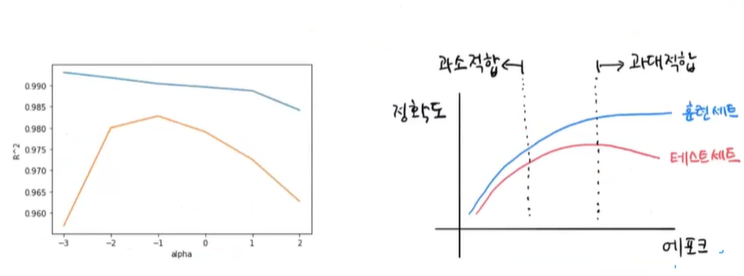

In [54]:
# 바꾸어 말하면 적은 에포크 횟수 동안에 훈련된 모델은 훈련세트와 테스트 세트에 맞지 않음(과소적합)
# 반대로 에포크 횟수가 많은 훈련 모델인 경우 너무 잘 맞아 테스트 세트에는 오히려 점수가 나쁨 (과대적합)

# 과대 적합이 되기 전에 훈련을 멈추는 것을 조기 종료라 한다.

import numpy as np

sc = SGDClassifier(loss='log_loss',random_state=42)

train_score = []        # 훈련세트 점수를 누적하는 빈 리스트
test_score = []         # 테스트세트 점수를 누적하는 빈 리스트
# train_target에 있는 7개의 생선목록을 제공
classes = np.unique(train_target)

#파이썬의 _변수는 1회용 임시변수
for _ in range(0,300):  # 300번의 에포크 동안 훈련 진행
    sc.partial_fit(train_scaled, train_target, classes=classes) # 훈련을 부분적으로 추가하는 particial_fit
    # 반복마다 훈련세트와 테스트 세트의 점수를 계산하여 train_score와 test_score 리스트에 추가함
    train_score.append(sc.score(train_scaled,train_target))     # 훈련 세트 점수를 빈 리스트에 추가
    test_score.append(sc.score(test_scaled,test_target))        # 테스트 세트 점수를 빈 리스트에 추가

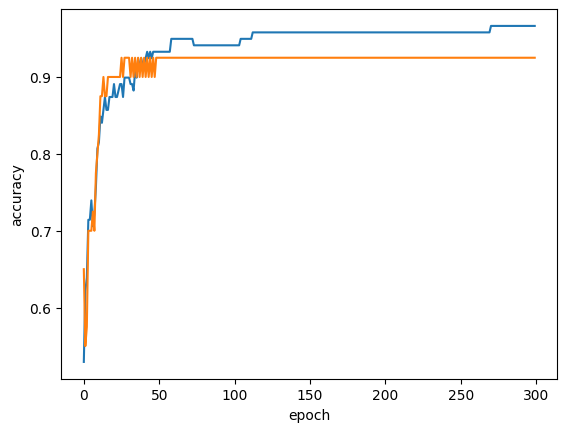

In [57]:
import matplotlib.pyplot as plt

plt.plot(train_score)   # 훈련 세트 점수
plt.plot(test_score)    # 테스트 세트 점수
plt.xlabel('epoch')     # 에포크 횟수
plt.ylabel('accuracy')  # 정확도
plt.show()

In [58]:
# 결론 : 에포크 횟수를 100번 정도 돌리니 차트상으로 과대 과소적합이 아닌 최상으로 나옴

sc= SGDClassifier(loss='log_loss',max_iter=100, tol=None, random_state=42)      #tol=None -> 조기종료하지 않음
# 확률적 경사 하강법은 일정 에포크 동안 성능이 향상되지 않으면 더이상 훈련하지 않고 자동으로 멈춤.
#
sc.fit(train_scaled,train_target)

print(sc.score(train_scaled,train_target))  # 95.79%
print(sc.score(test_scaled,test_target))    # 92.5%      최적의 상태로 분석됨

0.957983193277311
0.925


In [60]:
sc.predict(test_scaled[:5])

proba = sc.predict_proba(test_scaled[:5])
np.round(proba, decimals=3)

array([[0.   , 0.003, 0.774, 0.   , 0.219, 0.   , 0.005],
       [0.   , 0.001, 0.015, 0.   , 0.04 , 0.945, 0.   ],
       [0.   , 0.   , 0.011, 0.96 , 0.02 , 0.008, 0.001],
       [0.   , 0.   , 0.525, 0.   , 0.423, 0.   , 0.052],
       [0.   , 0.   , 0.688, 0.   , 0.306, 0.   , 0.006]])

In [61]:
sc.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype='<U9')

In [63]:
# 손실함수에 대한 loss 매개값
# loss 매개값의 기본값은 loss=hinge     (힌지 손실) -> 서포트 백터 머신이라고 불린다.
# 또다른 머신러닝 알고리즘을 위한 손실 함수이다.        https://velog.io/@lee9843/Word2Vec%EC%9D%84-%EC%9D%B4%ED%95%B4%ED%95%98%EA%B8%B0-%EC%9C%84%ED%95%9C-%EB%82%B4%EC%9A%A94-hinge-loss-%ED%9E%8C%EC%A7%80-%EC%86%90%EC%8B%A4

sc = SGDClassifier(loss='hinge',max_iter=100,tol=None,random_state=42)
sc.fit(train_scaled,train_target)

print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.9495798319327731
0.925
